442 10
(442,)


Text(0.5, 1.0, 'Scatter of Two Inputs')

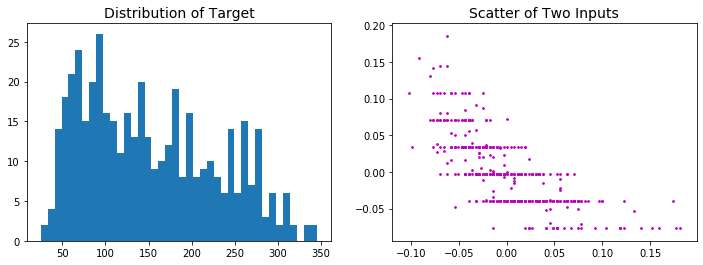

In [6]:
# 1, Linear regression on diabetes dataset
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
Y = diabetes.data
f = diabetes.target
NumData, NumFeatures = Y.shape
print(NumData, NumFeatures)
print(f.shape)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(f, bins=40)
ax[0].set_title("Distribution of Target", fontsize=14)
ax[1].scatter(Y[:,6], Y[:,7], c='m', s=3)
ax[1].set_title("Scatter of Two Inputs", fontsize=14)# two features

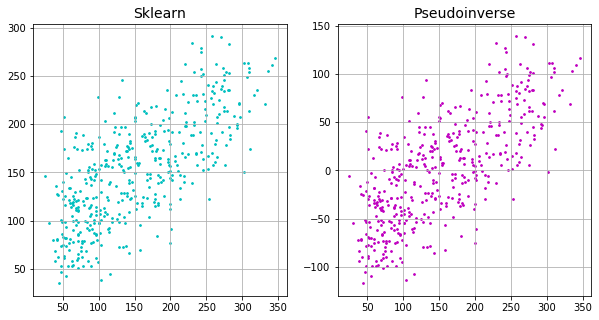

In [7]:
# 2, Comparing pseudo-inverse solution to sklearn output
# Linear regression using sklearn
#
import numpy as np
lin = LinearRegression()
lin.fit(Y, f)
fh1 = lin.predict(Y)
# Pseudo-inverse solution to linear regression
#
a = np.linalg.inv(Y.T @ Y) @ Y.T @ f
fh2 = Y @ a
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(f, fh1, c='c', s=3)
ax[0].grid(True)
ax[0].set_title("Sklearn", fontsize=14)

ax[1].scatter(f, fh2, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Pseudoinverse", fontsize=14)  
plt.savefig('Sklearn+Pseudoinverse')


In [8]:
from sklearn.metrics import mean_squared_error
print(round(mean_squared_error(f,fh1),4))
print(round(mean_squared_error(f,fh2+152.1334841628965),4))

2859.6904
2859.6904


In [9]:
print([ '%.2f' % elem for elem in lin.coef_ ])
print(round(lin.intercept_,2)) 
print([ '%.2f' % elem for elem in a ])

['-10.01', '-239.82', '519.84', '324.39', '-792.18', '476.75', '101.04', '177.06', '751.28', '67.63']
152.13
['-10.01', '-239.82', '519.84', '324.39', '-792.18', '476.75', '101.04', '177.06', '751.28', '67.63']


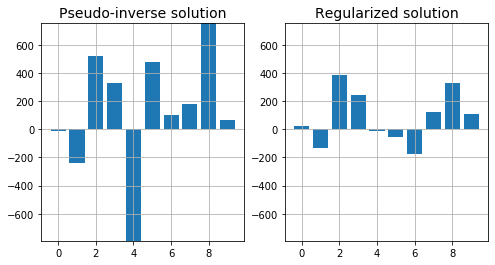

In [10]:
#3,Tikhanov regularizer
gamma = 0.5
aR = np.linalg.inv(Y.T@Y+ gamma*np.identity(NumFeatures)) @ Y.T @ f
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(a)), a)
ax[0].set_title('Pseudo-inverse solution', fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(a), np.max(a))
ax[1].bar(np.arange(len(aR)), aR)
ax[1].set_title('Regularized solution', fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(a), np.max(a))

plt.savefig('Pseudoinverse+Ridge')

(-792.1841616279662, 751.2793210872147)

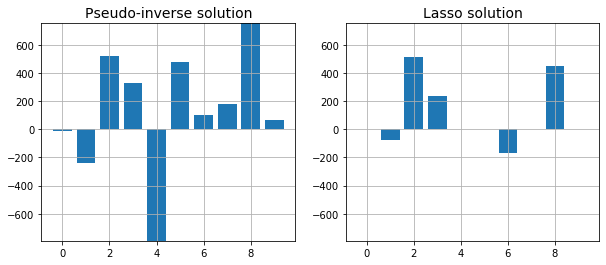

In [11]:
#4, Sparsity inducing (lasso) regularizer
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(Y, f)
yh_lasso = ll.predict(Y)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].bar(np.arange(len(a)), a)
ax[0].set_title('Pseudo-inverse solution', fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(a), np.max(a))
ax[1].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[1].set_title('Lasso solution', fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(a), np.max(a))

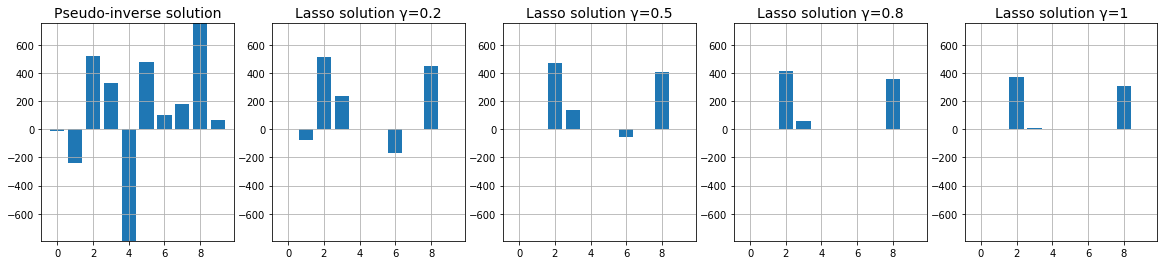

In [12]:
# Compare the sparsity inducing (lasso) regularizer with different γ
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(Y, f)
yh_lasso = ll.predict(Y)

ll2 = Lasso(alpha=0.5)
ll2.fit(Y, f)
yh_lasso2 = ll2.predict(Y)

ll3 = Lasso(alpha=0.8)
ll3.fit(Y, f)
yh_lasso3 = ll3.predict(Y)

ll4 = Lasso(alpha=1)
ll4.fit(Y, f)
yh_lasso4 = ll4.predict(Y)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,4))
ax[0].bar(np.arange(len(a)), a)
ax[0].set_title('Pseudo-inverse solution', fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(a), np.max(a))

ax[1].bar(np.arange(len(ll.coef_)), ll.coef_)
ax[1].set_title('Lasso solution γ=0.2', fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(a), np.max(a))

ax[2].bar(np.arange(len(ll2.coef_)), ll2.coef_)
ax[2].set_title('Lasso solution γ=0.5', fontsize=14)
ax[2].grid(True)
ax[2].set_ylim(np.min(a), np.max(a))

ax[3].bar(np.arange(len(ll3.coef_)), ll3.coef_)
ax[3].set_title('Lasso solution γ=0.8', fontsize=14)
ax[3].grid(True)
ax[3].set_ylim(np.min(a), np.max(a))

ax[4].bar(np.arange(len(ll4.coef_)), ll4.coef_)
ax[4].set_title('Lasso solution γ=1', fontsize=14)
ax[4].grid(True)
ax[4].set_ylim(np.min(a), np.max(a))

plt.savefig('Pseudoinverse+Lasso')

In [14]:
from sklearn.metrics import mean_squared_error
lasso = ll.predict(Y)
print(round(mean_squared_error(f,lasso),2))
lasso2 = ll2.predict(Y)
print(round(mean_squared_error(f,lasso2),2))
lasso3 = ll3.predict(Y)
print(round(mean_squared_error(f,lasso3),2))
lasso4 = ll4.predict(Y)
print(round(mean_squared_error(f,lasso4),2))


2995.0
3230.36
3548.73
3810.67


In [57]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [60]:
#5, Lasso Regularization path on a synthetic example:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))

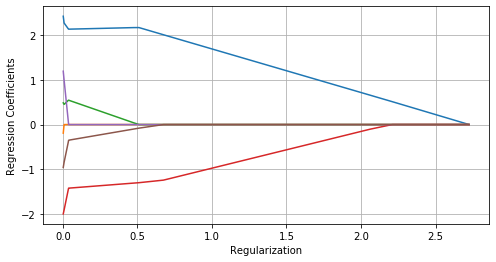

In [61]:
# Compute regressions with Lasso and return paths
# 
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")

plt.savefig('Lasso Path')

(932, 2261)
Index([                    0, 'Compound_Identifier',              'Source',
                    'SMILES',             'LogS.M.',                  'MW',
                       'AMW',                  'Sv',                  'Se',
                        'Sp',
       ...
              'Psychotic-80',        'Psychotic-50',        'Hypertens-80',
              'Hypertens-50',         'Hypnotic-80',         'Hypnotic-50',
             'Neoplastic-80',       'Neoplastic-50',        'Infective-80',
        'Infective-50\r\r\n'],
      dtype='object', length=2261)
(932, 2256)
(932,)


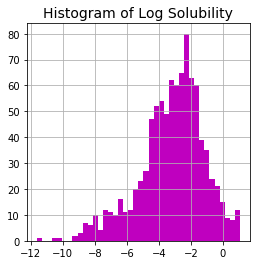

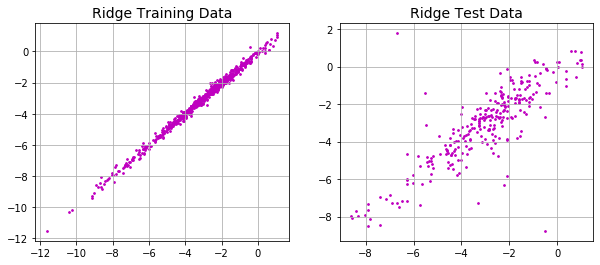

In [15]:
#6, Predicting Solubility of Chemical Compounds
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
colnames = sol.columns
print(colnames)
f = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(f, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)
ax.grid(True)

Y = sol[colnames[5:len(colnames)]]
N, p = Y.shape
print(Y.shape)
print(f.shape)
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
Y_train, Y_test, f_train, f_test = train_test_split(Y, f, test_size=0.3)
# Regularized regression
#
gamma = 2.3
a = np.linalg.inv(Y_train.T @ Y_train + gamma*np.identity(p)) @ Y_train.T @ f_train
fh_train = Y_train @ a.values
fh_test = Y_test @ a.values


# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(f_train, fh_train, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Ridge Training Data", fontsize=14)

ax[1].scatter(f_test, fh_test, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Ridge Test Data", fontsize=14)

plt.savefig('Predicting Solubility')

C:\Users\shafe_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165.0975831582031, tolerance: 0.26216935404907976
  positive)


Text(0.5, 1.0, 'Lasso Test Data')

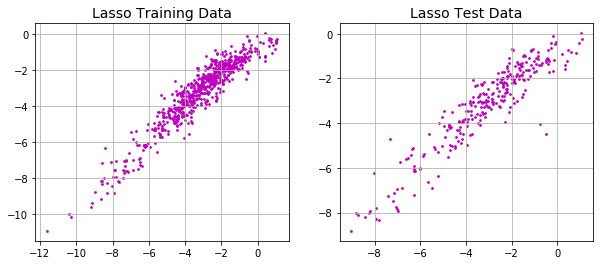

In [5]:
# Over to you for implementing Lasso

from sklearn.linear_model import Lasso
ll_s = Lasso(alpha=0.2)
ll_s.fit(Y_train, f_train)
lasso_train = ll_s.predict(Y_train)
lasso_test = ll_s.predict(Y_test)

# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(f_train, lasso_train, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Lasso Training Data γ=0.2", fontsize=14)

ax[1].scatter(f_test, lasso_test, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Lasso Test Dataγ=0.2", fontsize=14)



In [10]:
#the corresponding number of non-zero coefficients change with increasing regularization.
print(ll_s.coef_)
len([i for i, e in enumerate(ll_s.coef_) if e != 0])

[-0. -0. -0. ...  0. -0.  0.]


62

In [36]:
ll_s1 = Lasso(alpha=0.1)
ll_s1.fit(Y_train, f_train)
lasso_train1 = ll_s1.predict(Y_train)
lasso_test1 = ll_s1.predict(Y_test)

ll_s2 = Lasso(alpha=0.3)
ll_s2.fit(Y_train, f_train)
lasso_train2 = ll_s2.predict(Y_train)
lasso_test2 = ll_s2.predict(Y_test)

ll_s3 = Lasso(alpha=0.5)
ll_s3.fit(Y_train, f_train)
lasso_train3 = ll_s3.predict(Y_train)
lasso_test3 = ll_s3.predict(Y_test)

ll_s4 = Lasso(alpha=0.8)
ll_s4.fit(Y_train, f_train)
lasso_train4 = ll_s4.predict(Y_train)
lasso_test4 = ll_s4.predict(Y_test)


C:\Users\shafe_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.70017695889487, tolerance: 0.26216935404907976
  positive)
C:\Users\shafe_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.86351400884553, tolerance: 0.26216935404907976
  positive)
C:\Users\shafe_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.03956918607082, tolerance: 0.26216935404907976
  positive)
C:\Users\shafe_000\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

In [39]:
from sklearn.metrics import mean_squared_error
train_mse=mean_squared_error(f_train,lasso_train)
test_mse=mean_squared_error(f_test,lasso_test)

train_mse1=mean_squared_error(f_train,lasso_train1)
test_mse1=mean_squared_error(f_test,lasso_test1)

train_mse2=mean_squared_error(f_train,lasso_train2)
test_mse2=mean_squared_error(f_test,lasso_test2)

train_mse3=mean_squared_error(f_train,lasso_train3)
test_mse3=mean_squared_error(f_test,lasso_test3)

train_mse4=mean_squared_error(f_train,lasso_train4)
test_mse4=mean_squared_error(f_test,lasso_test4)


print(' γ=0.1,'+'# of non zeros:'+str(len([i for i, e in enumerate(ll_s1.coef_) if e != 0]))
      +',train mse:'+str(round(train_mse1,4))+',test_mse:'+str(round(test_mse1,4)))
print(' γ=0.2,'+'# of non zeros:'+str(len([i for i, e in enumerate(ll_s.coef_) if e != 0]))
      +',train mse:'+str(round(train_mse,4))+',test_mse:'+str(round(test_mse,4)))
print(' γ=0.3,'+'# of non zeros:'+str(len([i for i, e in enumerate(ll_s2.coef_) if e != 0]))
      +',train mse:'+str(round(train_mse2,4))+',test_mse:'+str(round(test_mse2,4)))
print(' γ=0.5,'+'# of non zeros:'+str(len([i for i, e in enumerate(ll_s3.coef_) if e != 0]))
      +',train mse:'+str(round(train_mse3,4))+',test_mse:'+str(round(test_mse3,4)))
print(' γ=0.8,'+'# of non zeros:'+str(len([i for i, e in enumerate(ll_s4.coef_) if e != 0]))
      +',train mse:'+str(round(train_mse4,4))+',test_mse:'+str(round(test_mse4,4)))

 γ=0.1,# of non zeros:88,train mse:0.3698,test_mse:0.6032
 γ=0.2,# of non zeros:62,train mse:0.4073,test_mse:0.5714
 γ=0.3,# of non zeros:50,train mse:0.4394,test_mse:0.5431
 γ=0.5,# of non zeros:43,train mse:0.4824,test_mse:0.5499
 γ=0.8,# of non zeros:33,train mse:0.5362,test_mse:0.5928


Text(0.5, 1.0, 'Lasso Test Data γ=0.5')

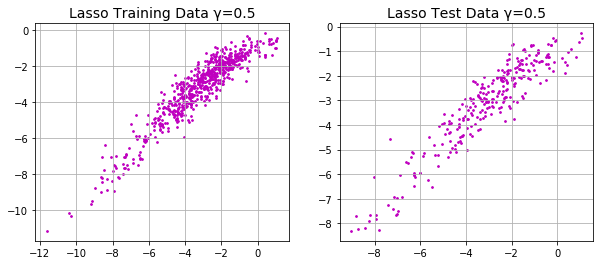

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(f_train, lasso_train1, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Lasso Training Data γ=0.5", fontsize=14)

ax[1].scatter(f_test, lasso_test1, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Lasso Test Data γ=0.5", fontsize=14)

Text(0.5, 1.0, 'Lasso Test Data γ=0.8')

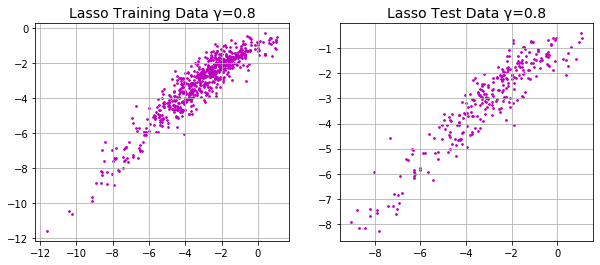

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(f_train, lasso_train2, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Lasso Training Data γ=0.8", fontsize=14)

ax[1].scatter(f_test, lasso_test2, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Lasso Test Data γ=0.8", fontsize=14)

Text(0.5, 1.0, 'Lasso Test Data γ=1')

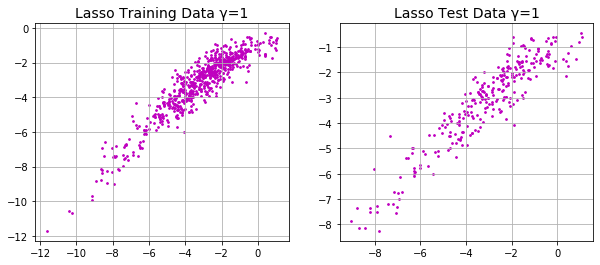

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(f_train, lasso_train3, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Lasso Training Data γ=1", fontsize=14)

ax[1].scatter(f_test, lasso_test3, c='m', s=3)
ax[1].grid(True) 
ax[1].set_title("Lasso Test Data γ=1", fontsize=14)

Text(0.5, 1.0, 'Lasso Test Data γ=10')

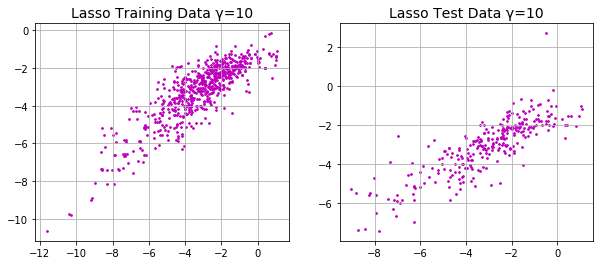

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax[0].scatter(f_train, lasso_train4, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Lasso Training Data γ=10", fontsize=14)

ax[1].scatter(f_test, lasso_test4, c='m', s=3)
ax[1].grid(True) 
ax[1].set_title("Lasso Test Data γ=10", fontsize=14)